In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs

TeamNames = pd.read_csv("TeamNames.txt",header = None)
ScoreList = pd.read_csv("CFB2019_scores.csv",header=None, names=['Team A index','Team A points', 'Team B index','Team B points'])
#print(TeamNames.shape,ScoreList.shape)

#create the matrix M
M =np.zeros((TeamNames.shape[0],TeamNames.shape[0]))
#print(M.shape)

#Calculating the updates to M based on the formula mentioned in the pdf
for i in range(len(ScoreList)):
    team_i,points_i,team_j,points_j=ScoreList.iloc[i]
    M[team_i-1,team_i-1]+=np.array([(points_i > points_j)]).astype('uint8')+points_i/(points_i+points_j)
    M[team_j-1,team_j-1]+=np.array([(points_i < points_j)]).astype('uint8')+points_j/(points_i+points_j)
    M[team_i-1,team_j-1]+=np.array([(points_i < points_j)]).astype('uint8')+points_j/(points_i+points_j)
    M[team_j-1,team_i-1]+=np.array([(points_i > points_j)]).astype('uint8')+points_i/(points_i+points_j)
#print(M[1,:])

#Normalizing the rows of M
for i in range(TeamNames.shape[0]):
    M[i]=M[i]/sum(M[i])
#print(sum(M[1,:]))

#Declaring w0 to be uniform distibution
w0= np.ones(TeamNames.shape[0])/TeamNames.shape[0]

T_list=[10,100,1000,10000]
w_t_list =[]
w_t = w0
for t in range(T_list[-1]+1):
    w_t = np.dot(w_t,M)
    if (t+1) in T_list:
        w_t_list.append(w_t)

#w_t_list is an array of 769,4 




In [2]:
#sort the elements based on their score and store it along with the score 
rankings_df = pd.DataFrame(np.arange(1, 26))
for i in range(len(w_t_list)):
    rank = np.argsort(w_t_list[i])[::-1][:25]
    top25_name = TeamNames.iloc[rank].reset_index(drop=True)
    top25_scores = np.around(w_t_list[i][rank], 5)
    rankings_df['Team Name at t='+str(T_list[i])] = top25_name
    rankings_df['Team Score at t='+str(T_list[i])] = top25_scores
rankings_df.to_excel('ranking.xlsx')


# Part-B


In [3]:
#Taking the eigen value and eigen vector of the M.T vector for calculating the w infinity
eigenValue,eigenVector=eigs(M.T,1)
#print(f"eigen values is{eigenValue} and the eigen vector is {eigenVector}")

w_infinity = eigenVector.T/np.sum(eigenVector.T)
#print(w_infinity)

In [4]:
#Plotting the difference between w_infinity and w_t
w_t=np.ones(TeamNames.shape[0])/TeamNames.shape[0]
difference =[]
for t in range(10000):
    w_t= np.dot(w_t,M)
    difference.append(np.sum(abs(w_t-w_infinity)))

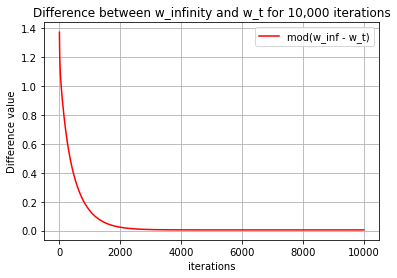

In [12]:
plt.figure()
plt.plot(difference, label='mod(w_inf - w_t)', color='red')
plt.ylabel('Difference value')
plt.xlabel('iterations')
plt.title('Difference between w_infinity and w_t for 10,000 iterations')
plt.grid()
plt.legend()
